In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

PROJECT_PATH = 'C:\\Users\\User\\visual_encoding'

import sys
sys.path.append(PROJECT_PATH)
from allen_vc.epoch_extraction_tools import *
from allen_vc.utils import ellipse_area

print('Packages Imported')

Packages Imported


In [13]:
data_directory = f'{PROJECT_PATH}\\data\\manifest_files'
manifest_path = os.path.join(data_directory, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
sessions = cache.get_session_table()
sessions = sessions[sessions.get('session_type')=='functional_connectivity']
sessions

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
766640955,2019-10-03T00:00:00Z,744912849,functional_connectivity,133.0,M,wt/wt,842,2233,6,"[MB, APN, NOT, DG, CA1, VISam, nan, PF, TH, LP..."
767871931,2019-10-03T00:00:00Z,753795610,functional_connectivity,135.0,M,wt/wt,713,2231,6,"[MRN, APN, MB, DG, CA1, VISrl, nan, VISam, PO,..."
768515987,2019-10-03T00:00:00Z,754477358,functional_connectivity,136.0,M,wt/wt,802,2217,6,"[MB, APN, NOT, DG, CA1, VISam, nan, Eth, LP, P..."
771160300,2019-10-03T00:00:00Z,754488979,functional_connectivity,142.0,M,wt/wt,930,2230,6,"[SCig, PPT, NOT, SUB, ProS, CA1, VISam, nan, A..."
771990200,2019-10-03T00:00:00Z,756578435,functional_connectivity,108.0,M,wt/wt,546,2229,6,"[APN, MB, DG, CA1, VISam, nan, PO, LP, VISpm, ..."
774875821,2019-10-03T00:00:00Z,759711152,functional_connectivity,114.0,M,wt/wt,649,2233,6,"[APN, LP, DG, CA1, VISrl, nan, MGv, MGd, CA3, ..."
778240327,2019-10-03T00:00:00Z,760938797,functional_connectivity,120.0,M,wt/wt,784,2234,6,"[APN, POL, LP, DG, CA1, VISrl, nan, ZI, IntG, ..."
778998620,2019-10-03T00:00:00Z,759674770,functional_connectivity,121.0,M,wt/wt,793,2229,6,"[APN, POL, LP, DG, CA3, CA1, VISrl, nan, ZI, M..."
779839471,2019-10-03T00:00:00Z,760960653,functional_connectivity,122.0,M,wt/wt,863,2220,6,"[APN, LP, MB, DG, CA1, VISrl, nan, TH, LGd, CA..."


In [14]:
session_id = 766640955
session = cache.get_session_data(session_id)
pupil_data = session.get_pupil_data()
pupil_data

,corneal_reflection_center_x,corneal_reflection_center_y,corneal_reflection_height,corneal_reflection_width,corneal_reflection_phi,pupil_center_x,pupil_center_y,pupil_height,pupil_width,pupil_phi,eye_center_x,eye_center_y,eye_height,eye_width,eye_phi
Time (s),,,,,,,,,,,,,,,
3.16310,299.137235,216.363625,17.029759,15.409788,-0.711592,295.982824,182.389771,101.692206,116.309730,0.184439,287.005728,200.927650,233.450400,308.216303,0.041631
3.19620,298.643778,216.468772,15.442400,17.253583,0.750496,295.893294,182.197393,102.152150,116.887858,0.148822,286.668325,200.961694,233.068281,308.061276,0.043075
3.21337,298.134375,216.190673,14.423082,18.210202,0.208638,295.624467,181.095378,98.744130,117.813833,0.158267,286.803647,201.082064,232.860844,307.942422,0.045384
3.24650,297.990495,216.188021,14.570752,17.058950,0.177946,295.494799,181.098779,99.391207,117.875017,0.187046,286.750337,201.186453,233.034616,308.295703,0.043620
3.27980,298.085050,216.183575,14.250737,17.044627,0.252906,295.045221,180.895720,98.683640,117.982812,0.205872,286.641870,201.182470,233.057262,308.425055,0.042899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9780.51952,297.378461,214.934605,12.279164,15.503512,0.076321,290.101502,182.371573,115.117078,123.869934,0.003386,286.006422,199.925475,247.387882,318.939870,0.035353
9780.55298,297.393556,214.646622,12.360885,15.782158,0.129144,290.273275,182.392984,115.208053,126.055849,-0.040949,285.285224,199.879293,247.094993,318.101914,0.012502
9780.58647,297.341600,214.485859,12.101698,15.409251,0.046656,290.295480,182.689893,115.913561,126.234008,-0.089210,285.612348,200.934096,245.472698,317.924084,0.019499


In [15]:
# Create area feature
pupil_data['pupil_area'] = ellipse_area(pupil_data['pupil_width'].to_numpy()/2,
                                        pupil_data['pupil_height'].to_numpy()/2)

In [47]:
# remove missing data due to blinks etc.
pupil_data = pupil_data[pupil_data['pupil_area'].notna()]

In [48]:
pupil_data = pupil_data.reset_index()

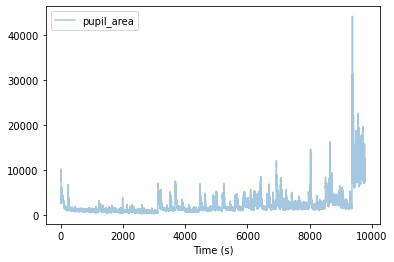

In [49]:
pupil_data.plot(x = 'Time (s)', y = 'pupil_area', alpha = 0.4);

In [50]:
np.diff(pupil_data.get('Time (s)'))

array([0.0331 , 0.01717, 0.03313, ..., 0.03349, 0.0332 , 0.03386])

In [51]:
1/np.mean(np.diff(pupil_data.get('Time (s)')))

29.969960297879833

In [52]:
from scipy import interpolate

fs = 30

time_points = pupil_data.get('Time (s)').to_numpy()
values = pupil_data.get('pupil_area').to_numpy()

#Create uniform set of data using interpolation
model = interpolate.interp1d(time_points, values)
time = np.arange(time_points[0], time_points[-1], 1/fs)
area = model(time)

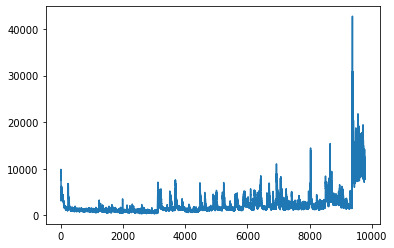

In [53]:
plt.plot(time, area);

In [55]:
# Can we identify epochs of dilation v. constriction?

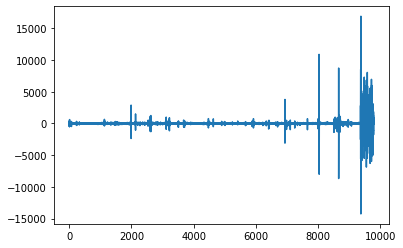

In [56]:
deriv =  np.diff(area)

plt.plot(time[:-1], deriv);

In [82]:
min_gap, min_duration = 0.1, 1.5
dilation = get_epoch_times(deriv, 0, min_gap, min_duration, fs)[0]
constriction = get_epoch_times(-1*deriv, 0, min_gap, min_duration, fs)[0]

Identified 60099 epochs
Joined 31479 / 60099 epochs
Dropped 28565 / 28620 epochs
Dropped 1 / 56 epochs
Identified 60098 epochs
Joined 34103 / 60098 epochs
Dropped 25917 / 25995 epochs
Dropped 4 / 79 epochs


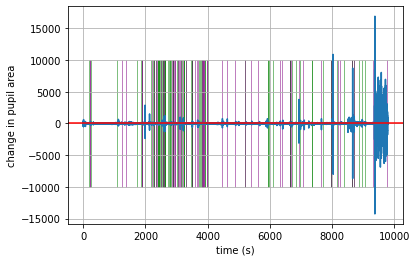

In [83]:
fig, ax = plt.subplots()
ax.plot(time[:-1], deriv)
ax.set(xlabel='time (s)', ylabel='change in pupil area')
ax.grid()

fill_offset = 0
fill_bound = 10000

for epoch in constriction:
    lower, upper =  int(epoch[0]), int(epoch[1])
    ax.fill_between(range(lower, upper), fill_offset - fill_bound, 
                    fill_offset + fill_bound, alpha=0.5, color='green')
    
for epoch in dilation:
    lower, upper =  int(epoch[0]), int(epoch[1])
    ax.fill_between(range(lower, upper), fill_offset - fill_bound, 
                    fill_offset + fill_bound, alpha=0.5, color='purple')
    
plt.axhline(0, color='red', linestyle = '-')
#ax.set_xlim([2950,3000])
#ax.set_ylim([-100,100])

(0.0, 1000.0)

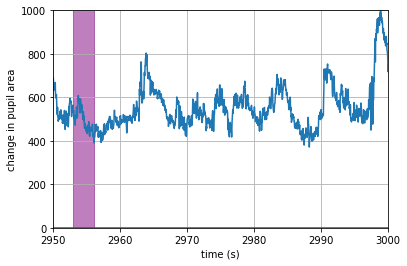

In [89]:
fig, ax = plt.subplots()
ax.plot(time, area)
ax.set(xlabel='time (s)', ylabel='change in pupil area')
ax.grid()

fill_offset = 20000
fill_bound = 20000

for epoch in constriction:
    lower, upper =  int(epoch[0]), int(epoch[1])
    ax.fill_between(range(lower, upper), fill_offset - fill_bound, 
                    fill_offset + fill_bound, alpha=0.5, color='green')
    
for epoch in dilation:
    lower, upper =  int(epoch[0]), int(epoch[1])
    ax.fill_between(range(lower, upper), fill_offset - fill_bound, 
                    fill_offset + fill_bound, alpha=0.5, color='purple')
    
plt.axhline(0, color='red', linestyle = '-')
ax.set_xlim([2950,3000])
ax.set_ylim([0,1000])

In [134]:
# try adding a median filter
from scipy.ndimage import median_filter

KERNEL_SIZE = 100 # choose a different size?

area_filt =  median_filter(area, KERNEL_SIZE)

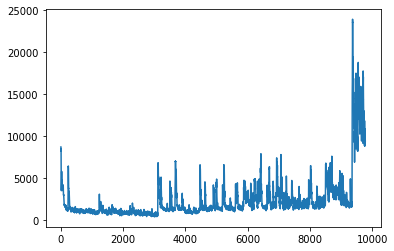

In [135]:
plt.plot(time, area_filt);

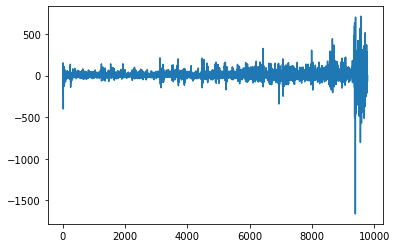

In [136]:
deriv =  np.diff(area_filt)

plt.plot(time[:-1], deriv);

Identified 7187 epochs
Joined 2024 / 7187 epochs
Dropped 5150 / 5163 epochs
Dropped 0 / 14 epochs
Identified 8225 epochs
Joined 2530 / 8225 epochs
Dropped 5664 / 5695 epochs
Dropped 1 / 32 epochs


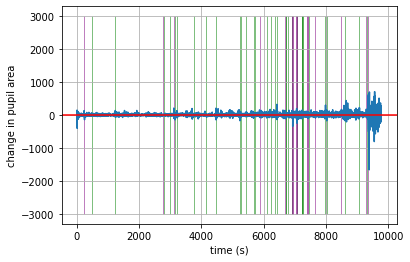

In [140]:
min_gap, min_duration = 0.1, 5

dilation = get_epoch_times(deriv, 0, min_gap, min_duration, fs)[0]
constriction = get_epoch_times(-1*deriv, 0, min_gap, min_duration, fs)[0]

fig, ax = plt.subplots()
ax.plot(time[:-1], deriv)
ax.set(xlabel='time (s)', ylabel='change in pupil area')
ax.grid()

fill_offset = 0
fill_bound = 3000

for epoch in constriction:
    lower, upper =  int(epoch[0]), int(epoch[1])
    ax.fill_between(range(lower, upper), fill_offset - fill_bound, 
                    fill_offset + fill_bound, alpha=0.5, color='green')
    
for epoch in dilation:
    lower, upper =  int(epoch[0]), int(epoch[1])
    ax.fill_between(range(lower, upper), fill_offset - fill_bound, 
                    fill_offset + fill_bound, alpha=0.5, color='purple')
    
plt.axhline(0, color='red', linestyle = '-');
#ax.set_xlim([7160,7170])
#ax.set_ylim([-100, 130])

(0.0, 8000.0)

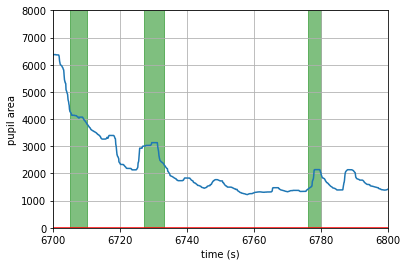

In [147]:
fig, ax = plt.subplots()
ax.plot(time, area_filt)
ax.set(xlabel='time (s)', ylabel='pupil area')
ax.grid()

fill_offset = 15000
fill_bound = 15000

for epoch in constriction:
    lower, upper =  int(epoch[0]), int(epoch[1])
    ax.fill_between(range(lower, upper), fill_offset - fill_bound, 
                    fill_offset + fill_bound, alpha=0.5, color='green')
    
for epoch in dilation:
    lower, upper =  int(epoch[0]), int(epoch[1])
    ax.fill_between(range(lower, upper), fill_offset - fill_bound, 
                    fill_offset + fill_bound, alpha=0.5, color='purple')
    
plt.axhline(0, color='red', linestyle = '-')
ax.set_xlim([6700,6800])
ax.set_ylim([0,8000])

In [73]:
# might want to use another constriction/dilation identification method